# Quola Business Problem: 

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Quola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.
As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Quola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.
You are working as a data scientist with the Analytics Department of Quola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like
•	Demographics (city, age, gender etc.)
•	Tenure information (joining date, Last Date)
•	Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

# Column Profiling:

1.	MMMM-YY : Reporting Date (Monthly)
2.	Driver_ID : Unique id for drivers
3.	Age : Age of the driver
4.	Gender : Gender of the driver – Male : 0, Female: 1
5.	City : City Code of the driver
6.	Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
7.	Income : Monthly average Income of the driver
8.	Date Of Joining : Joining date for the driver
9.	LastWorkingDate : Last date of working for the driver
10.	Joining Designation : Designation of the driver at the time of joining
11.	Grade : Grade of the driver at the time of reporting
12.	Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
13.	Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

# Importing Libraries:

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from scipy import stats
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')
## Display all the columns of the dataframes
pd.pandas.set_option('display.max_columns',None)
import textwrap

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sns.set_style('darkgrid')

# Functions used in the case study

In [233]:
## Outlier detection function and box potting variables

def outlier_function(dataframe):
    for feature in dataframe.columns:
        if is_numeric_dtype(dataframe[feature]) == True:
            
            plt.rcParams["figure.figsize"] = (20,5)
            
            plt.subplot(121)
            
            Q3 = dataframe[feature].quantile(.75)
            Q1 = dataframe[feature].quantile(.25)
            IQR = Q3 - Q1
            max_value = Q3 + 1.5 * IQR
            min_value = Q1 - 1.5 * IQR

            min_value = 0 if min_value <= 0 else min_value

            values_over_max = dataframe[dataframe[feature] > max_value].count()[0]
            values_under_min = dataframe[dataframe[feature] < min_value].count()[0]

            sns.boxplot(x = feature, data = dataframe
                ,palette = "Set3",  showmeans = True,
                meanprops = {"marker" : "o", "markerfacecolor" : "white", "markersize" : "5", "markeredgecolor" : "black" })

            plt.title(feature + " box plot",fontsize = 18)
            
            ################
            
            plt.subplot(122)
            
            plt.title(feature + " dist plot",fontsize = 18)
            
            sns.distplot(dataframe[feature])
            

            plt.show()

            print(f"Mean is {round(np.mean(dataframe[feature]),0)} | Median is {round(np.median(dataframe[feature]),0)} ")
            print(f"# Outliers over upper limit ({round(max_value,0)}) are {values_over_max}")
            print(f"# Outliers under lower limit ({round(min_value,0)}) are {values_under_min}")
            print(" "*80)
            print("-"*80)
            print(" "*80)

In [234]:
## Outlier Treatment function
def outlier_treatment(df, col, ul , ll):
    
    for feature in col:
        Q3 = df[feature].quantile(.75)
        Q1 = df[feature].quantile(.25)
        IQR = Q3 - Q1
        max_value = Q3 + 1.5 * IQR
        min_value = Q1 - 1.5 * IQR
        if ul == 1:
            df[feature][df[feature] > max_value] = max_value
        elif ll == 1:
            df[feature][df[feature] < min_value] = min_value
        elif ul == 1 and ll == 1:
            df[feature][df[feature] > max_value] = max_value
            df[feature][df[feature] < min_value] = min_value
        else:
            print("Input ul or ll or both as 1")

In [404]:
## Univariate plotting and analysis function

def univariate_plots(dataframe):
    for feature in dataframe.columns[1:]:
        n = len(feature)
        if is_numeric_dtype(dataframe[feature]) == True:
            
            ## Freedman-Diaconis rule (for finding no of bins)
            Q3 = data[feature].quantile(.75)
            Q1 = data[feature].quantile(.25)
            IQR = Q3 - Q1
            max_value = max(data[feature])
            min_value = min(data[feature])
            
            bin_width = (2 * IQR) / (n** (1 / 3))
            bin_count = int(np.ceil((max_value - min_value) / bin_width))
            
            if bin_count < 10:
                ## Sturge’s rule (for finding no of bins)
                bin_count = int(np.ceil(np.log2(n)) + 1)
            
            if bin_count < 10: 
                ## 10 is default
                bin_count = 10
            
            sns.histplot(data = dataframe, x = feature, bins = bin_count ,kde = True)
            plt.title(f"Histplot of {feature}", fontsize = 18)
            plt.xlabel(feature,fontsize = 14)
            plt.ylabel(f"Count of {feature}",fontsize = 14)
            plt.xticks(fontsize = 12)
            plt.yticks(fontsize = 12)
            plt.show()
            print(" "*80)
            print(" "*7 + "-"*74)
            print(" "*80)
        else:
            m = data[feature].nunique()
            sns.countplot(x = feature, data = dataframe, palette = "Set2",order= data[feature].value_counts().index[0:m])
            ageb_txt = list(data[feature].value_counts())

           # for idx,val in enumerate(ageb_txt):
              #  plt.text(idx,val+.1,str(val),fontsize=12,ha="center")
            
            plt.title(f"Countplot of {feature}", fontsize = 18)
            plt.xlabel(feature,fontsize = 14)
            plt.ylabel(f"Count of {feature}",fontsize = 14)
            plt.xticks(fontsize = 12)
            plt.yticks(fontsize = 12)
            plt.show()
            print(" "*80)
            print(" "*7 + "-"*74)
            print(" "*80)

In [236]:
## Color class for highlighting print statements

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BQuQuola = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [237]:
## Unique value function

def unique_count(dataframe):

    for feature in dataframe.columns:
        if dataframe[feature].nunique() <= 25:
            print(color.BQuQuola + color.BLUE + "Variable name: " + feature  + color.END)
            print(dataframe[feature].value_counts(normalize = True))
            print(" "*40)
            print("-"*40)
            print(" "*40)
        else:
            print(color.BQuQuola + color.BLUE + "Variable name: " + feature  + color.END)
            print(f"# unique values =  {dataframe[feature].nunique()}")
            print(f"Data type = {dataframe.dtypes[feature]}")
            print(" "*40)
            print("-"*40)
            print(" "*40)

In [238]:
## Basic description function

def basic_des(cs_name):
    print(color.BQuQuola + color.BLUE +  f'{cs_name} Shape is {data.shape}' + color.END)
    print()
    print("-" * 80)
    print()
    print(color.BQuQuola + color.BLUE +  f"{cs_name} Basic Information" + color.END)
    print()
    print(data.info())
    print()
    print("-" * 80)
    print()
    print(color.BQuQuola + color.BLUE + f"{cs_name} Null value count percentage:" + color.END)
    print()
    print(round(data.isnull().sum(axis=0) / len(data) * 100,2))
    print()
    print("-" * 80)
    print()
    print(color.BQuQuola + color.BLUE + f"{cs_name} Description:" + color.END)
    print()
    print(data.describe())
    print()
    print("-" * 80)
    print()
    print(color.BQuQuola + color.BLUE + f"{cs_name} Deep Description:" + color.END)
    print()
    print(data.describe().T)
    print()
    print("-" * 80)
    print()
    print(color.BQuQuola + color.BLUE + f"{cs_name} Duplicate values:" + color.END)
    print()
    print(data.loc[data.duplicated()])
    print(color.BQuQuola + color.BLUE + f"Number of duplicated values is/are: {data.duplicated().sum()}" + color.END)
    print()
    print("-" * 80)
    print()
    print(color.BQuQuola + color.BLUE + f"{cs_name} Number of unique values:" + color.END)
    print()
    print(data.nunique())
    print()
    print("-" * 80)


In [239]:
def missing_to_df(df):
    #Number and percentage of missing data in training data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

In [240]:
## Convert datatype to date
def to_date(dataframe, columns):
    for feature in columns:
        dataframe[feature] = dataframe[feature].astype("datetime64")
        dataframe[feature] = pd.to_datetime(dataframe[feature], format='%Y-%m-%d')

# Exploratory Data Analysis

## 1. Reading the data:

In [241]:
data = pd.read_csv("Quola_driver_scaler.csv")

## 2. Basic Statistics on preprocessed data

In [242]:
basic_des("Loan Tap case study -")

Loan Tap case study - Shape is (19104, 14)

--------------------------------------------------------------------------------

Loan Tap case study - Basic Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total

## 3. Unique value details

In [243]:
unique_count(data)

Variable name: Unnamed: 0
# unique values =  19104
Data type = int64
                                        
----------------------------------------
                                        
Variable name: MMM-YY
01/01/19    0.053497
02/01/19    0.049414
03/01/19    0.045540
12/01/20    0.042871
10/01/20    0.042818
08/01/20    0.042504
09/01/20    0.042347
07/01/20    0.042190
11/01/20    0.042138
12/01/19    0.041614
04/01/19    0.041562
01/01/20    0.040934
11/01/19    0.040881
06/01/20    0.040306
05/01/20    0.040096
05/01/19    0.039992
09/01/19    0.039887
02/01/20    0.039835
07/01/19    0.039625
08/01/19    0.039468
10/01/19    0.038683
04/01/20    0.038160
06/01/19    0.038003
03/01/20    0.037636
Name: MMM-YY, dtype: float64
                                        
----------------------------------------
                                        
Variable name: Driver_ID
# unique values =  2381
Data type = int64
                                        
----------------------

## 4. Dataset basic inspection

In [244]:
data.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [245]:
data.tail()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2
19103,19103,12/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,411480,2


# Data Preprocessing

In [246]:
data.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

## 1. Convert Dateofjoining & MMM-YY into date datatype from Object

In [247]:
columns = ['MMM-YY','Dateofjoining','LastWorkingDate']

In [248]:
## Calling to_date function
to_date(data,columns)

In [249]:
## Check
for i in columns:
    print(data[i].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


## 2. Making LastWorkingDay as our dependent variable

In [250]:
## If LastWorkingDay is empty that means driver is still working with us else he has left
## Hence if LastWorkingDay is empty, flag that as 1 else 0

In [251]:
data['Active_Flag'] = data['LastWorkingDate']

In [252]:
data['Active_Flag'] = data['Active_Flag'].fillna(1)

In [253]:
data['Active_Flag'][data['Active_Flag'] != 1] = 0

In [254]:
## Check
data['Active_Flag'].unique()

array([1, 0], dtype=object)

In [255]:
data['Active_Flag'] = data['Active_Flag'].astype(int)

In [256]:
## Changing data type to int
data['Active_Flag'].dtype

dtype('int32')

## 3. Creating a new variable LastWorkingDate; even for Drivers who are still working
        # This will help us in calculating no of active days for a driver

In [257]:
max_date = data['LastWorkingDate'].max()

In [258]:
data['MMM-YY'].max()

Timestamp('2020-12-01 00:00:00')

In [259]:
data['LastWorkingDate'] = data['LastWorkingDate'].fillna(max_date)

## 4. Missing Value Treatment using KNN Imputation

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            19104 non-null  int64         
 1   MMM-YY                19104 non-null  datetime64[ns]
 2   Driver_ID             19104 non-null  int64         
 3   Age                   19043 non-null  float64       
 4   Gender                19052 non-null  float64       
 5   City                  19104 non-null  object        
 6   Education_Level       19104 non-null  int64         
 7   Income                19104 non-null  int64         
 8   Dateofjoining         19104 non-null  datetime64[ns]
 9   LastWorkingDate       19104 non-null  datetime64[ns]
 10  Joining Designation   19104 non-null  int64         
 11  Grade                 19104 non-null  int64         
 12  Total Business Value  19104 non-null  int64         
 13  Quarterly Rating

In [261]:
data.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Active_Flag'],
      dtype='object')

### We will only consider rows which are completly available for finding best k

In [262]:
df = data.dropna(how = 'any')

In [263]:
## Checking using missing_to_df function
missing_to_df(df)

,Total,Percent
Active_Flag,0,0.0
Quarterly Rating,0,0.0
Total Business Value,0,0.0
Grade,0,0.0
Joining Designation,0,0.0
LastWorkingDate,0,0.0
Dateofjoining,0,0.0
Income,0,0.0
Education_Level,0,0.0
City,0,0.0


### We will only consider numercial column

In [264]:
df = df[['Driver_ID','Age', 'Gender', 'Education_Level', 'Income', 'Active_Flag',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating']]

In [265]:
## Checking
df.columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Active_Flag', 'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

## KNN Model implementation

### Finding the best K

In [266]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline

In [267]:
X = df.drop(['Active_Flag'], axis = 1)
y = df['Active_Flag']

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [268]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Train Model and Predict
k = 4  
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.8757567780994999


In [269]:
## Now it’s time to improve the model and find out the optimal k value.

Minimum error:- 0.08818110028954988 at K = 12


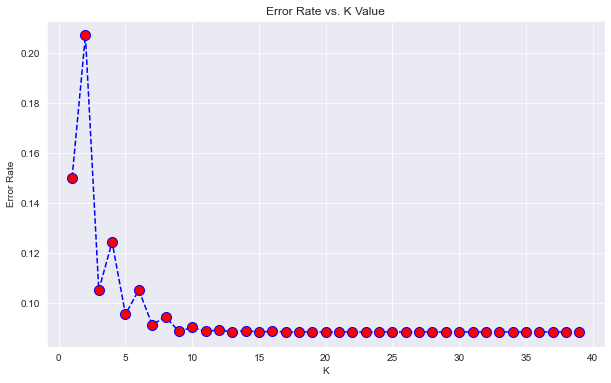

In [270]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [271]:
## Further on, we visualize the plot between accuracy and K value.

Maximum accuracy:- 0.9118188997104502 at K = 12


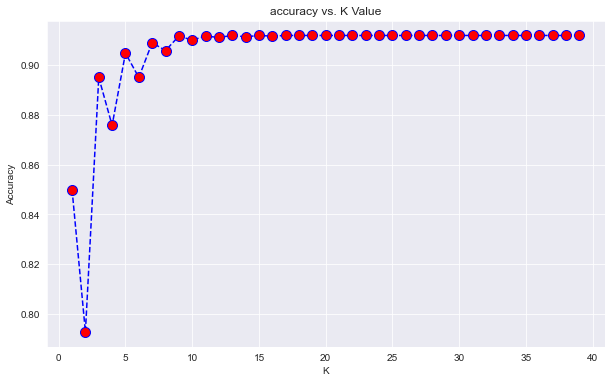

In [272]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

### Comment
K = 12 has the minimum error and the maximum accuracy

### Imputing missing values, with k = 12

In [273]:
from sklearn.impute import KNNImputer

In [274]:
imputer = KNNImputer(n_neighbors = 12)

In [275]:
data_num = data[['Driver_ID','Age', 'Gender', 'Education_Level', 'Income', 'Active_Flag',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating']]

In [276]:
##data_num = preprocessing.StandardScaler().fit(data_num).transform(data_num.astype(float))

In [277]:
data_num = imputer.fit_transform(data_num)

In [278]:
data_num

array([[ 1.00000e+00,  2.80000e+01,  0.00000e+00, ...,  1.00000e+00,
         2.38106e+06,  2.00000e+00],
       [ 1.00000e+00,  2.80000e+01,  0.00000e+00, ...,  1.00000e+00,
        -6.65480e+05,  2.00000e+00],
       [ 1.00000e+00,  2.80000e+01,  0.00000e+00, ...,  1.00000e+00,
         0.00000e+00,  2.00000e+00],
       ...,
       [ 2.78800e+03,  3.00000e+01,  0.00000e+00, ...,  2.00000e+00,
         0.00000e+00,  2.00000e+00],
       [ 2.78800e+03,  3.00000e+01,  0.00000e+00, ...,  2.00000e+00,
         2.00420e+05,  2.00000e+00],
       [ 2.78800e+03,  3.00000e+01,  0.00000e+00, ...,  2.00000e+00,
         4.11480e+05,  2.00000e+00]])

In [279]:
data_num = pd.DataFrame(data_num, columns = ['Driver_ID','Age', 'Gender', 'Education_Level', 'Income', 'Active_Flag',
       'Joining Designation', 'Grade', 'Total Business Value','Quarterly Rating']) 

In [280]:
# Check
missing_to_df(data_num)

,Total,Percent
Quarterly Rating,0,0.0
Total Business Value,0,0.0
Grade,0,0.0
Joining Designation,0,0.0
Active_Flag,0,0.0
Income,0,0.0
Education_Level,0,0.0
Gender,0,0.0
Age,0,0.0
Driver_ID,0,0.0


In [281]:
data_num.head()

,Driver_ID,Age,Gender,Education_Level,Income,Active_Flag,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,1.0,2381060.0,2.0
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,1.0,-665480.0,2.0
2,1.0,28.0,0.0,2.0,57387.0,0.0,1.0,1.0,0.0,2.0
3,2.0,31.0,0.0,2.0,67016.0,1.0,2.0,2.0,0.0,1.0
4,2.0,31.0,0.0,2.0,67016.0,1.0,2.0,2.0,0.0,1.0


In [282]:
data.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Active_Flag'],
      dtype='object')

## Aggregating Data

### A) Aggregating from inputed data

In [283]:
final = data_num.groupby('Driver_ID')

In [284]:
final_agg = final.agg({'Age' : 'max', 'Gender' : 'first', 'Education_Level' : 'last', 'Active_Flag' : 'last', 'Joining Designation' : 'last', 'Total Business Value' : 'sum'})

In [285]:
final_agg = final_agg.reset_index()

In [286]:
## Check 1: No of Unique drivers in initial data should be equal to rows in final_agg
data['Driver_ID'].nunique()

2381

In [287]:
final_agg['Driver_ID'].count()

2381

In [288]:
## Check 2: No of Driver who have left should remain same
data_num['Driver_ID'][data_num['Active_Flag'] == 0].count()

1616

In [289]:
final_agg['Driver_ID'][final_agg['Active_Flag'] == 0].count()

1616

### B) Aggregating from Initial dataset

In [290]:
final_2 = data.groupby('Driver_ID')

In [291]:
final_2_agg = final_2.agg({'City' : 'first', 'Income' : ['first' , 'max'], 'Dateofjoining' : 'first','LastWorkingDate' : 'last', 'Grade' : 'last', 'Quarterly Rating' : ['first','max']})

In [292]:
final_2_agg = final_2_agg.reset_index()

In [293]:
final_2_agg.columns

MultiIndex([(       'Driver_ID',      ''),
            (            'City', 'first'),
            (          'Income', 'first'),
            (          'Income',   'max'),
            (   'Dateofjoining', 'first'),
            ( 'LastWorkingDate',  'last'),
            (           'Grade',  'last'),
            ('Quarterly Rating', 'first'),
            ('Quarterly Rating',   'max')],
           )

In [294]:
final_2_agg.columns = ['_'.join(col) for col in final_2_agg.columns.values]

In [295]:
final_2_agg.columns

Index(['Driver_ID_', 'City_first', 'Income_first', 'Income_max',
       'Dateofjoining_first', 'LastWorkingDate_last', 'Grade_last',
       'Quarterly Rating_first', 'Quarterly Rating_max'],
      dtype='object')

In [296]:
final_2_agg.rename(columns={'Driver_ID_': 'Driver_ID', 'City_first': 'City', 'Dateofjoining_first' : 'Dateofjoining',
                           'LastWorkingDate_last': 'LastWorkingDate','Grade_last' : 'Grade'} , inplace=True)

In [297]:
final_2_agg.columns

Index(['Driver_ID', 'City', 'Income_first', 'Income_max', 'Dateofjoining',
       'LastWorkingDate', 'Grade', 'Quarterly Rating_first',
       'Quarterly Rating_max'],
      dtype='object')

In [298]:
final_2_agg["Days_Active"] = (final_2_agg["LastWorkingDate"].dt.date - final_2_agg['Dateofjoining'].dt.date)

In [299]:
final_2_agg["Days_Active"] = final_2_agg["Days_Active"].dt.days

In [300]:
final_2_agg["Days_Active"].head()

0     77
1     52
2    142
3     57
4    150
Name: Days_Active, dtype: int64

## Creating Flags for Rating and Income

In [301]:
final_2_agg['Income_flag'] = np.where(final_2_agg['Income_max'] - final_2_agg['Income_first'] > 0, 1, 0)

In [302]:
final_2_agg['Rating_flag'] = np.where(final_2_agg['Quarterly Rating_max'] - final_2_agg['Quarterly Rating_first'] > 0, 1, 0)

In [303]:
final_2_agg['Driver_ID'].count()

2381

## Combining both datasets based on Driver_ID

In [304]:
final_agg.columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Active_Flag',
       'Joining Designation', 'Total Business Value'],
      dtype='object')

In [305]:
final_2_agg.columns

Index(['Driver_ID', 'City', 'Income_first', 'Income_max', 'Dateofjoining',
       'LastWorkingDate', 'Grade', 'Quarterly Rating_first',
       'Quarterly Rating_max', 'Days_Active', 'Income_flag', 'Rating_flag'],
      dtype='object')

In [306]:
combined_df = pd.merge(final_agg, final_2_agg)

In [307]:
combined_df.columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Active_Flag',
       'Joining Designation', 'Total Business Value', 'City', 'Income_first',
       'Income_max', 'Dateofjoining', 'LastWorkingDate', 'Grade',
       'Quarterly Rating_first', 'Quarterly Rating_max', 'Days_Active',
       'Income_flag', 'Rating_flag'],
      dtype='object')

In [308]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Driver_ID               2381 non-null   float64       
 1   Age                     2381 non-null   float64       
 2   Gender                  2381 non-null   float64       
 3   Education_Level         2381 non-null   float64       
 4   Active_Flag             2381 non-null   float64       
 5   Joining Designation     2381 non-null   float64       
 6   Total Business Value    2381 non-null   float64       
 7   City                    2381 non-null   object        
 8   Income_first            2381 non-null   int64         
 9   Income_max              2381 non-null   int64         
 10  Dateofjoining           2381 non-null   datetime64[ns]
 11  LastWorkingDate         2381 non-null   datetime64[ns]
 12  Grade                   2381 non-null   int64   

In [309]:
## Removing columns which may not add value as we now have derived columns

In [310]:
combined_df = combined_df.drop(['Income_first','Quarterly Rating_first','LastWorkingDate','Income_max'
                                ,'Quarterly Rating_max','Joining Designation'], axis = 1)

In [311]:
combined_df.columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Active_Flag',
       'Total Business Value', 'City', 'Dateofjoining', 'Grade', 'Days_Active',
       'Income_flag', 'Rating_flag'],
      dtype='object')

## Statistical Summary of Derived Dataset

In [313]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   float64       
 1   Age                   2381 non-null   float64       
 2   Gender                2381 non-null   float64       
 3   Education_Level       2381 non-null   float64       
 4   Active_Flag           2381 non-null   float64       
 5   Total Business Value  2381 non-null   float64       
 6   City                  2381 non-null   object        
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   Grade                 2381 non-null   int64         
 9   Days_Active           2381 non-null   int64         
 10  Income_flag           2381 non-null   int32         
 11  Rating_flag           2381 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(2), int64(2), object(1)
memory usage

In [314]:
combined_df.describe()

,Driver_ID,Age,Gender,Education_Level,Active_Flag,Total Business Value,Grade,Days_Active,Income_flag,Rating_flag
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.776879,0.411032,1.00756,0.321294,4.586742e+06,2.096598,436.133977,0.018480,0.293574
std,806.161628,5.918461,0.491602,0.81629,0.467071,9.127115e+06,0.941522,567.366471,0.134706,0.455495
min,1.000000,21.000000,0.000000,0.00000,0.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000
25%,695.000000,30.000000,0.000000,0.00000,0.000000,0.000000e+00,1.000000,99.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,0.000000,8.176800e+05,2.000000,192.000000,0.000000,0.000000
75%,2100.000000,37.000000,1.000000,2.00000,1.000000,4.173650e+06,3.000000,479.000000,0.000000,1.000000
max,2788.000000,58.000000,1.000000,2.00000,1.000000,9.533106e+07,5.000000,2828.000000,1.000000,1.000000


### Creating Dependent and Independent datasets

In [315]:
X = combined_df.drop(['Active_Flag'], axis = 1)
y = combined_df['Active_Flag']

In [393]:
X.columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Total Business Value',
       'City', 'Dateofjoining', 'Grade', 'Days_Active', 'Income_flag',
       'Rating_flag', 'Edu_new', 'Grade_new'],
      dtype='object')

## Univariate PLots

In [408]:
X_num = X[['Age','Gender', 'Total Business Value', 'City', 'Grade']]

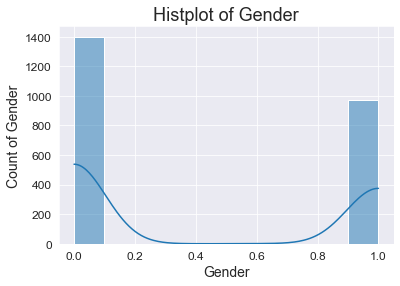

                                                                                
       --------------------------------------------------------------------------
                                                                                


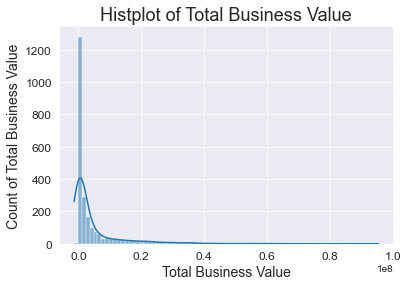

                                                                                
       --------------------------------------------------------------------------
                                                                                


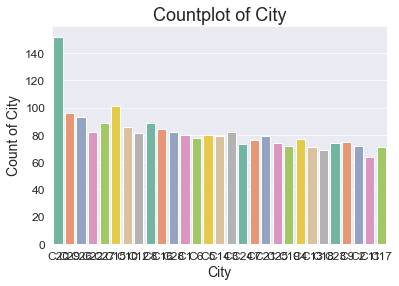

                                                                                
       --------------------------------------------------------------------------
                                                                                


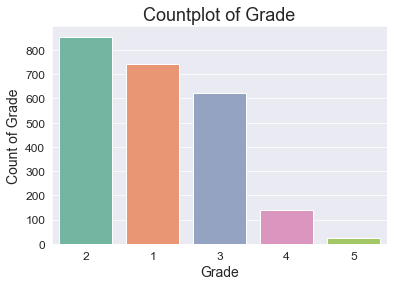

                                                                                
       --------------------------------------------------------------------------
                                                                                


In [409]:
univariate_plots(X_num)

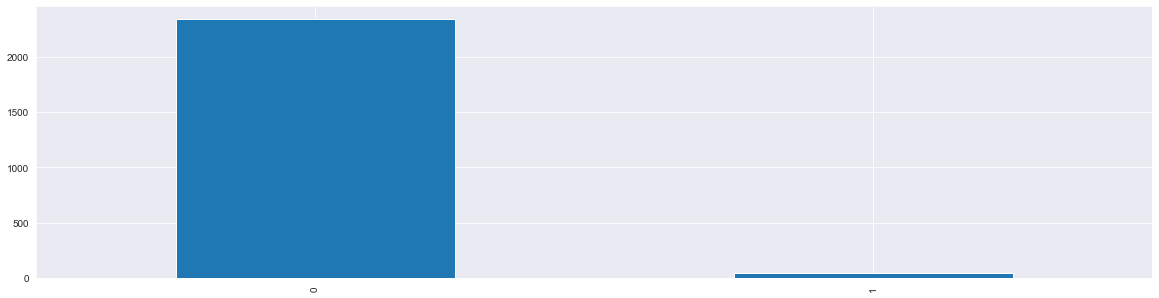

In [472]:
X['Income_flag'].value_counts().plot(kind="bar")
plt.show()

In [470]:
X['Income_flag'].value_counts()

0    2337
1      44
Name: Income_flag, dtype: int64

### Comment:
- There are only 44 drivers (~2%) for whom the Income increased

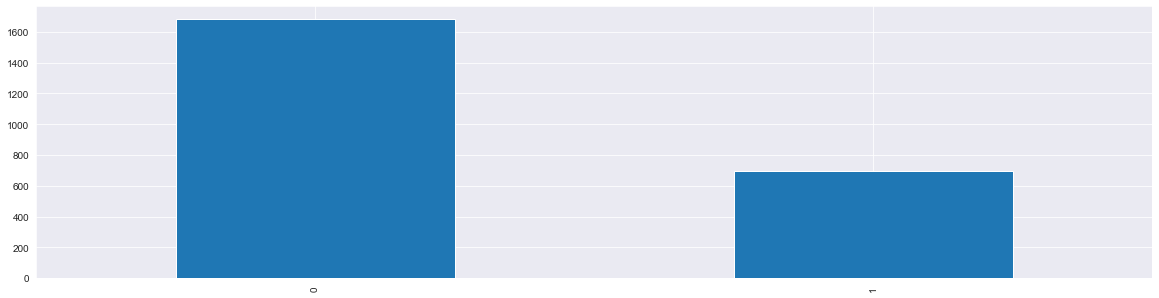

In [471]:
X['Rating_flag'].value_counts().plot(kind="bar")
plt.show()

In [421]:
X['Rating_flag'].value_counts()

0    1682
1     699
Name: Rating_flag, dtype: int64

In [422]:
699 / (1682+699)

0.29357412851742964

### Comment:
- There are about 30% drivers for whom the Rating Increased

## Finding Outliers and Treatment 

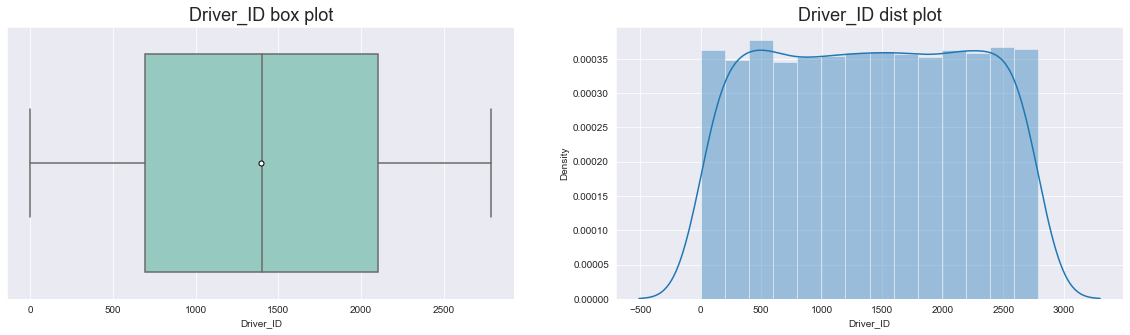

Mean is 1398.0 | Median is 1400.0 
# Outliers over upper limit (4208.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


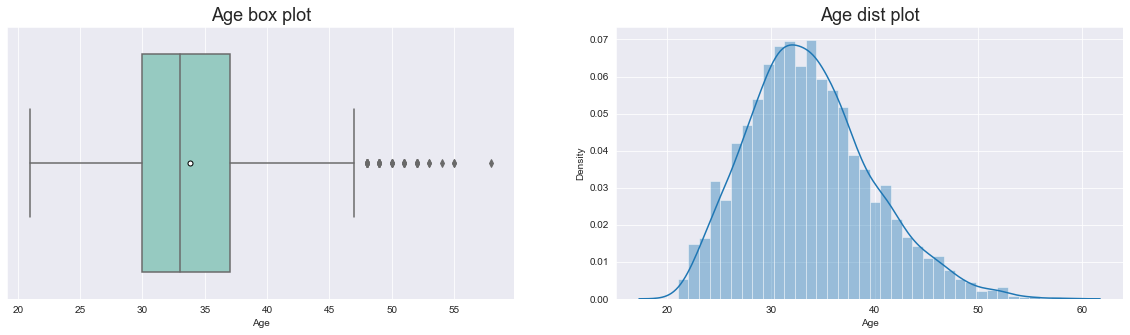

Mean is 34.0 | Median is 33.0 
# Outliers over upper limit (48.0) are 49
# Outliers under lower limit (20.0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


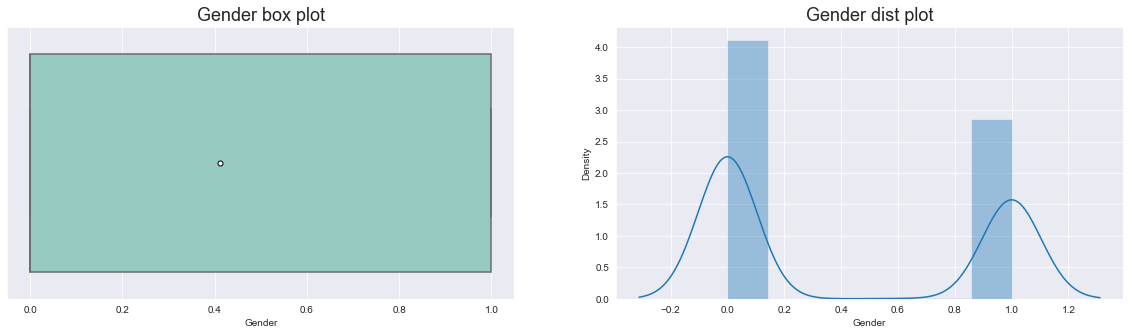

Mean is 0.0 | Median is 0.0 
# Outliers over upper limit (2.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


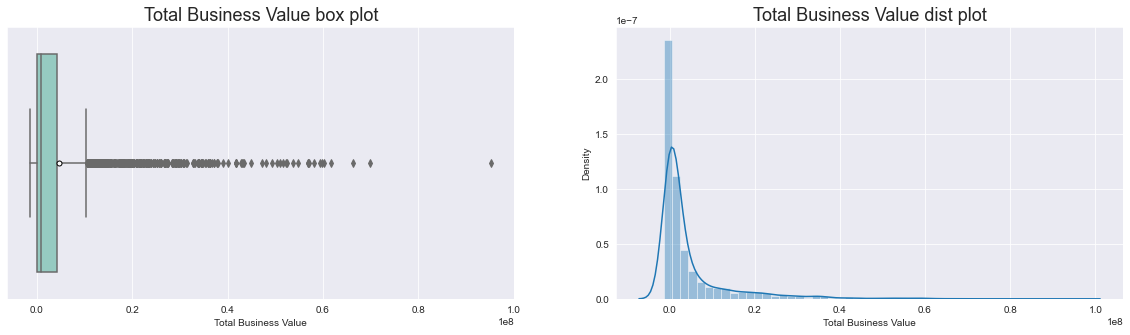

Mean is 4586742.0 | Median is 817680.0 
# Outliers over upper limit (10434125.0) are 336
# Outliers under lower limit (0) are 10
                                                                                
--------------------------------------------------------------------------------
                                                                                


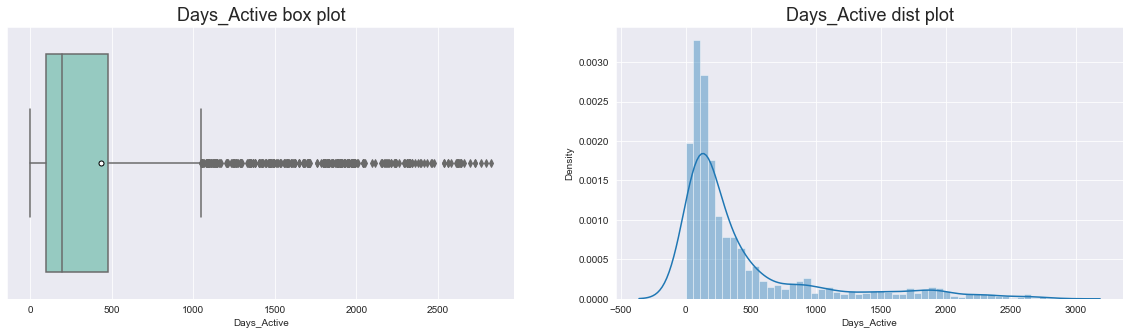

Mean is 436.0 | Median is 192.0 
# Outliers over upper limit (1049.0) are 307
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


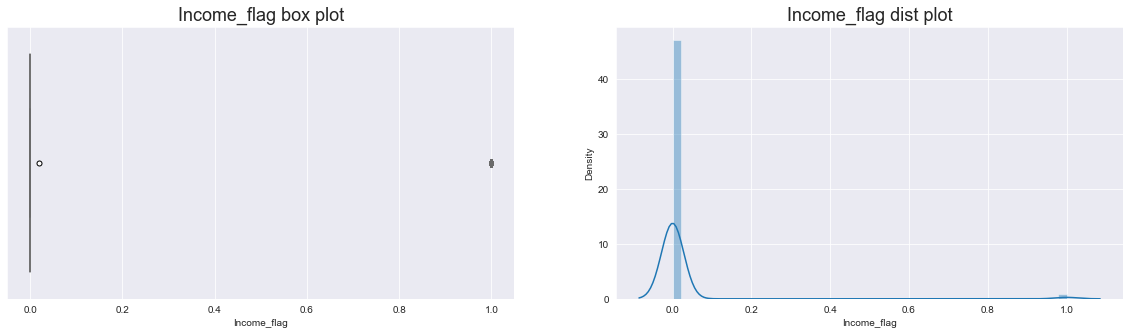

Mean is 0.0 | Median is 0.0 
# Outliers over upper limit (0.0) are 44
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


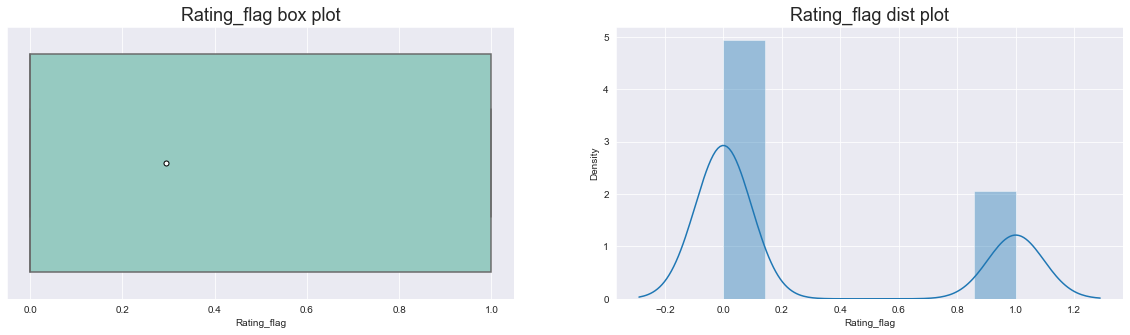

Mean is 0.0 | Median is 0.0 
# Outliers over upper limit (2.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


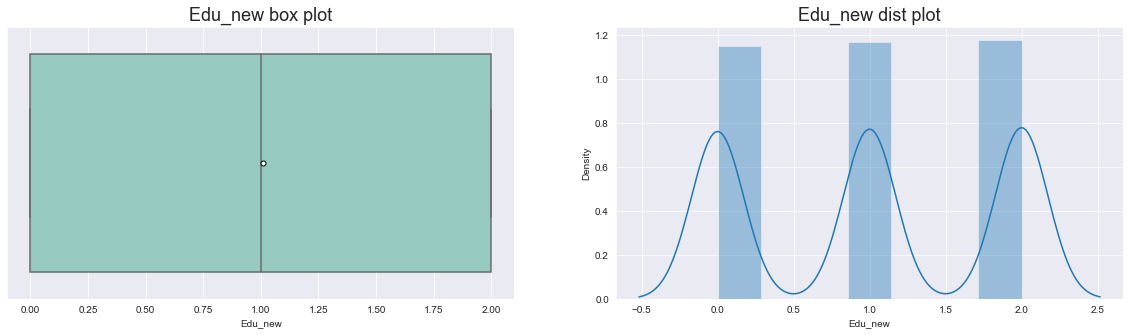

Mean is 1.0 | Median is 1.0 
# Outliers over upper limit (5.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


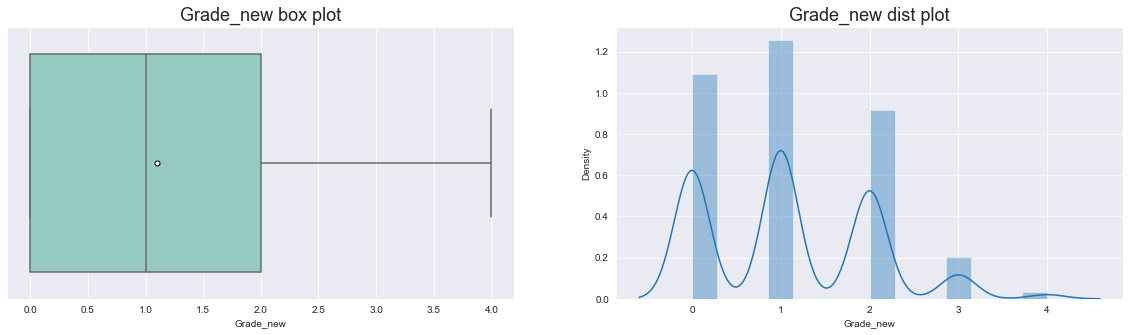

Mean is 1.0 | Median is 1.0 
# Outliers over upper limit (5.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


In [423]:
outlier_function(X)

### Outlier Treatment

In [426]:
X['Age'][X['Age'] > 48] = 48 

In [429]:
X['Total Business Value'][X['Total Business Value'] > 10434125] = 10434125

In [430]:
X['Days_Active'][X['Days_Active'] > 1049] = 1049

## Multivariate Plots: Correlation between independent variables

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

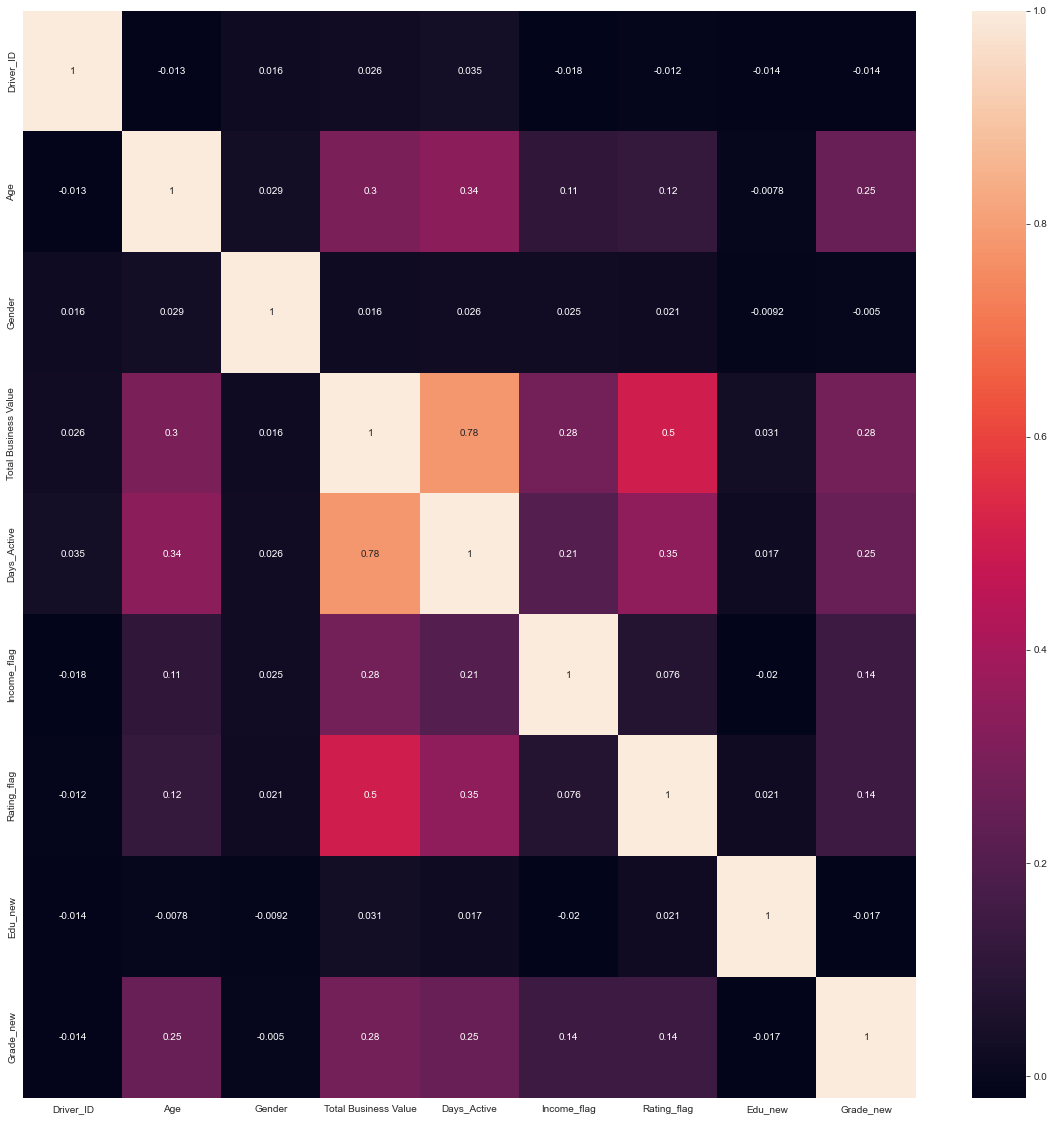

In [431]:
plt.figure(figsize = (20,20))
sns.heatmap(X.corr(),annot = True)
plt.show()

### Comment
No significant correlation between Independent variables

## Pairplot

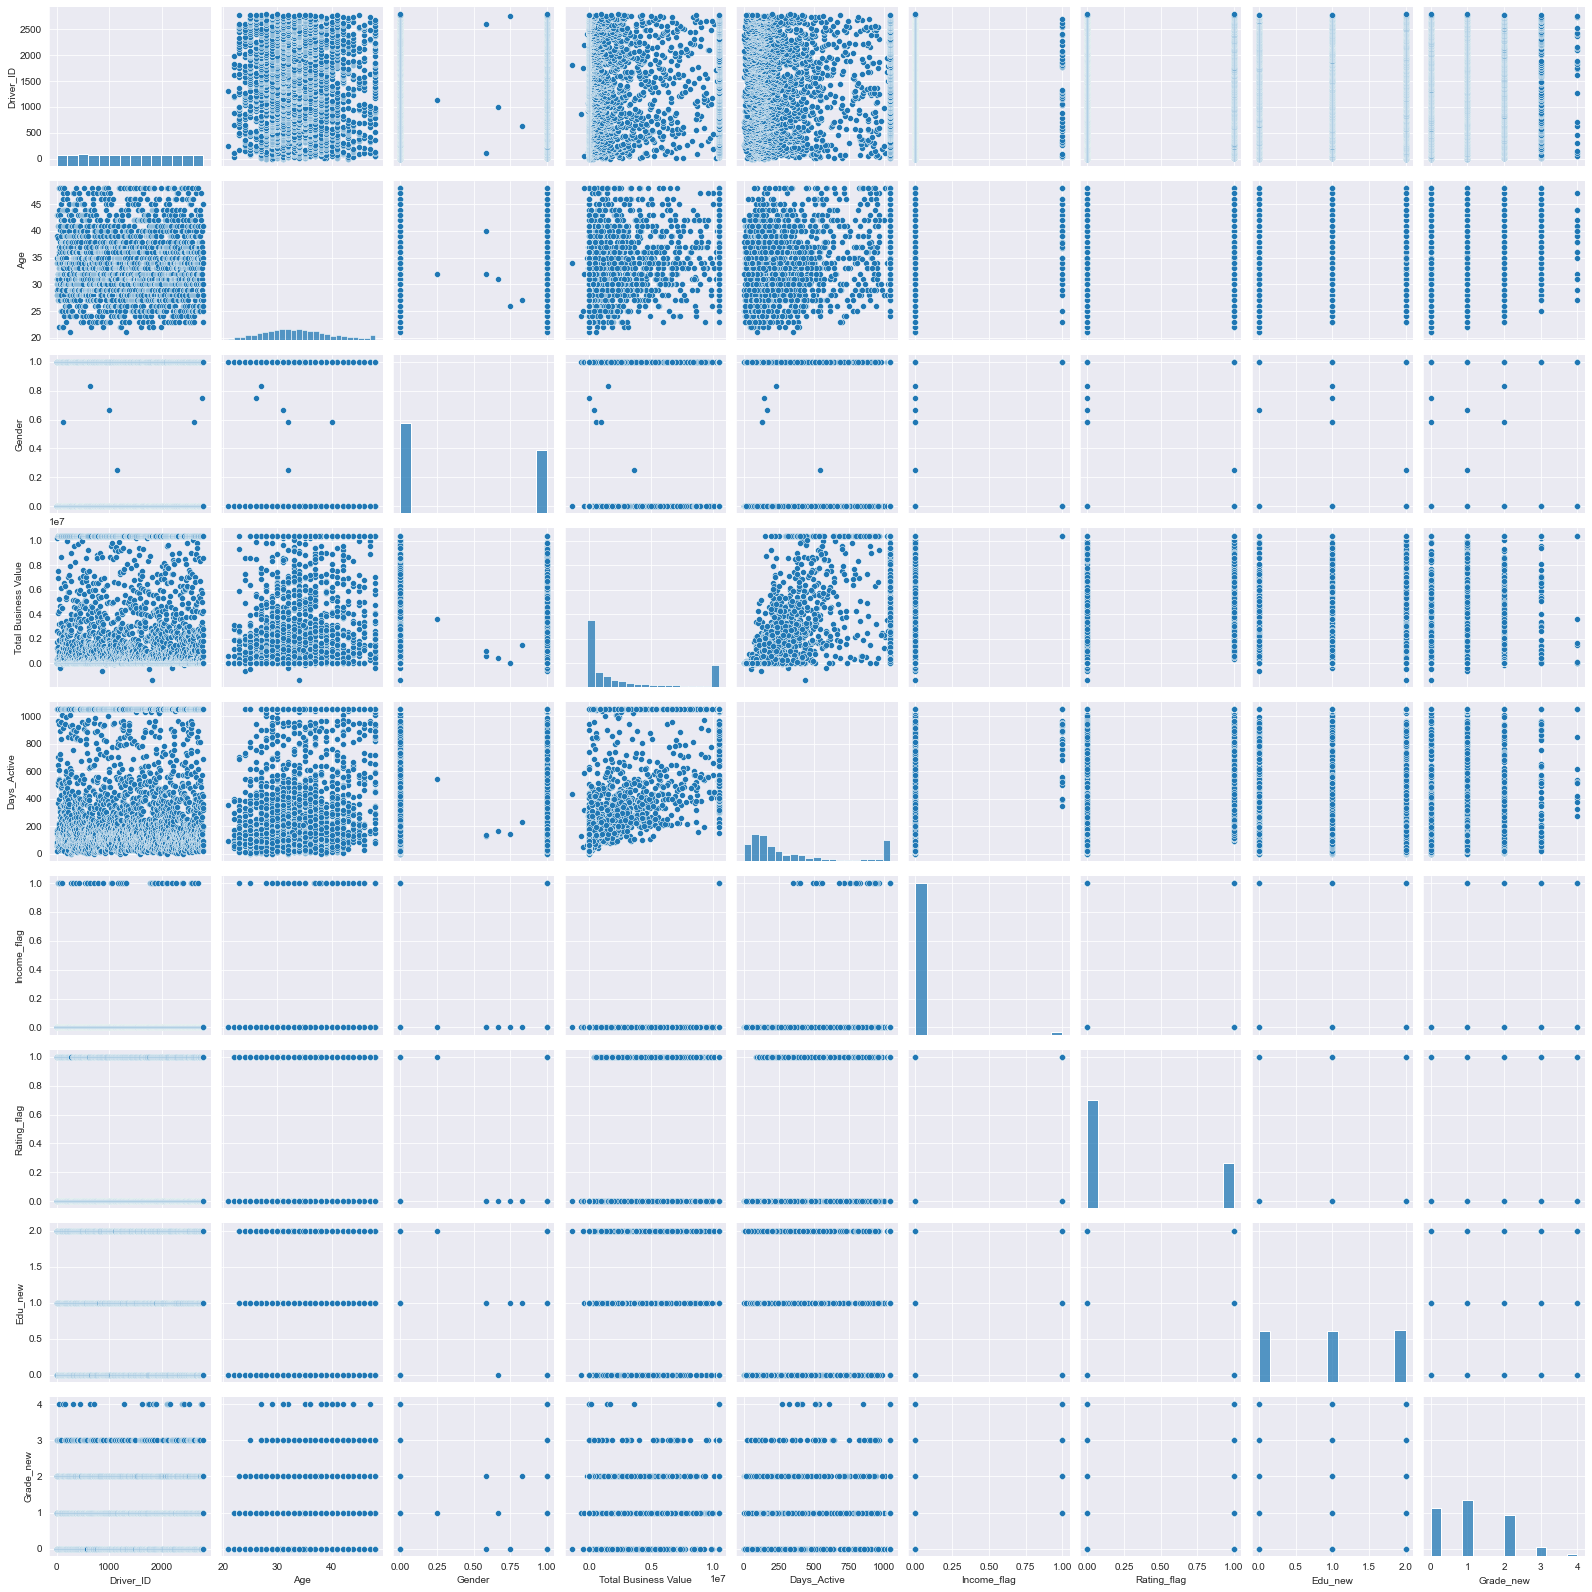

In [432]:
sns.pairplot(X)
plt.show()

## Encoding for Catgorical Variables

In [195]:
X['Education_Level'].unique()

array([2., 0., 1.])

In [196]:
X['Grade'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [197]:
X['City'].unique()

array(['C23', 'C7', 'C13', 'C9', 'C11', 'C2', 'C19', 'C26', 'C20', 'C17',
       'C29', 'C10', 'C24', 'C14', 'C6', 'C28', 'C5', 'C18', 'C27', 'C15',
       'C8', 'C25', 'C21', 'C1', 'C4', 'C3', 'C16', 'C22', 'C12'],
      dtype=object)

In [199]:
X['City'].value_counts().sort_values(ascending=False)  / X['City'].count()

C20    0.063839
C15    0.042419
C29    0.040319
C26    0.039059
C8     0.037379
C27    0.037379
C10    0.036119
C16    0.035279
C22    0.034439
C3     0.034439
C28    0.034439
C12    0.034019
C5     0.033599
C1     0.033599
C21    0.033179
C14    0.033179
C6     0.032759
C4     0.032339
C7     0.031919
C9     0.031499
C23    0.031079
C25    0.031079
C24    0.030659
C2     0.030239
C19    0.030239
C17    0.029819
C13    0.029819
C18    0.028979
C11    0.026879
Name: City, dtype: float64

### Comment 
- City is evenly divided in the data and it will be computationlly expensive to create so many encoded variables; 
- Hence not doing encoding on City 

In [433]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
 
# Converting type of columns to category
X['Education_Level'] = X['Education_Level'].astype('category')
X['Grade'] = X['Grade'].astype('category')

## Assigning numerical values and storing it in another columns

X['Edu_new'] = X['Education_Level'].cat.codes
X['Grade_new'] = X['Grade'].cat.codes

## Create an instance of One-hot-encoder
enc=OneHotEncoder()
 
#Passing encoded columns
'''
NOTE: we have converted the enc.fit_transform() method to array because the fit_transform method
of OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we
have huge  number of categorical variables
'''
enc_data=pd.DataFrame(enc.fit_transform(X[['Edu_new','Grade_new']]).toarray())
    
#Merge with main
X_df=X.join(enc_data)
 
print(X_df)

      Driver_ID   Age  Gender Education_Level  Total Business Value City  \
0           1.0  28.0     0.0             2.0             1715580.0  C23   
1           2.0  31.0     0.0             2.0                   0.0   C7   
2           4.0  43.0     0.0             2.0              350000.0  C13   
3           5.0  29.0     0.0             0.0              120360.0   C9   
4           6.0  31.0     1.0             1.0             1265000.0  C11   
...         ...   ...     ...             ...                   ...  ...   
2376     2784.0  34.0     0.0             0.0            10434125.0  C24   
2377     2785.0  34.0     1.0             0.0                   0.0   C9   
2378     2786.0  45.0     0.0             0.0             2815090.0  C19   
2379     2787.0  28.0     1.0             2.0              977830.0  C20   
2380     2788.0  30.0     0.0             2.0             2298240.0  C27   

     Dateofjoining Grade  Days_Active  Income_flag  Rating_flag  Edu_new  \
0       201

### Renaming Encoded Columns

In [434]:
X_df.columns

Index([           'Driver_ID',                  'Age',               'Gender',
            'Education_Level', 'Total Business Value',                 'City',
              'Dateofjoining',                'Grade',          'Days_Active',
                'Income_flag',          'Rating_flag',              'Edu_new',
                  'Grade_new',                      0,                      1,
                            2,                      3,                      4,
                            5,                      6,                      7],
      dtype='object')

In [435]:
X_df.columns = ['Driver_ID',                    'Age',               'Gender',
            'Education_Level', 'Total Business Value',                 'City',
              'Dateofjoining',                'Grade',          'Days_Active',
                'Income_flag',          'Rating_flag',              'Edu_new',
                  'Grade_new',               'EDU_L0',               'EDU_L1',
                     'EDU_L2',              'Grade_1',              'Grade_2',
                    'Grade_3',              'Grade_4',              'Grade_5'
                    ]

### Drop columns which have been encoded

In [436]:
X_df.drop(['Grade','Education_Level','Edu_new', 'Grade_new','City','Dateofjoining'], axis=1, inplace=True)

In [437]:
X_df.columns

Index(['Driver_ID', 'Age', 'Gender', 'Total Business Value', 'Days_Active',
       'Income_flag', 'Rating_flag', 'EDU_L0', 'EDU_L1', 'EDU_L2', 'Grade_1',
       'Grade_2', 'Grade_3', 'Grade_4', 'Grade_5'],
      dtype='object')

## Class Imbalance Treatment

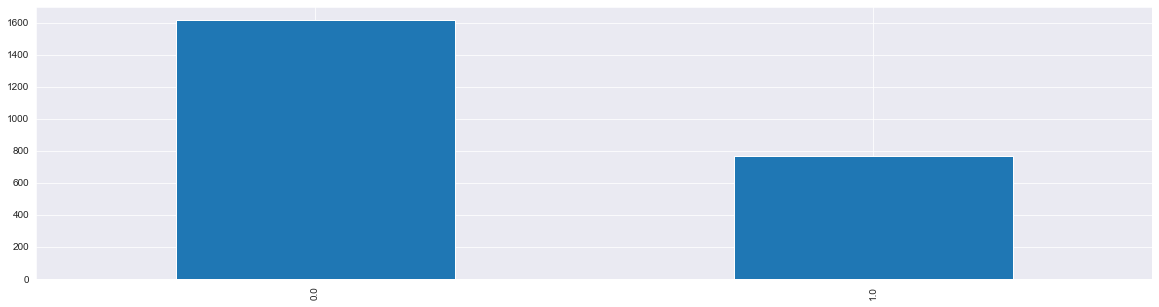

In [438]:
y.value_counts().plot(kind = 'bar')
plt.show()

In [439]:
y.value_counts() / y.count()

0.0    0.678706
1.0    0.321294
Name: Active_Flag, dtype: float64

### Comment
- 68% of the drivers have left
- only 32% are still active

## Using SMOTE
- We are using SMOTE since it will be more accurate than random under-sampling as all information is retained since we didn’t remove any records.

In [104]:
pip install imblearn

In [440]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [441]:
X_df.head()

,Driver_ID,Age,Gender,Total Business Value,Days_Active,Income_flag,Rating_flag,EDU_L0,EDU_L1,EDU_L2,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5
0,1.0,28.0,0.0,1715580.0,77,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2.0,31.0,0.0,0.0,52,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,4.0,43.0,0.0,350000.0,142,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,5.0,29.0,0.0,120360.0,57,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6.0,31.0,1.0,1265000.0,150,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [442]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_df, y)

In [443]:
print('Original dataset shape', X_df.shape, y.shape)
print('Resample dataset shape', x_smote.shape, y_smote.shape)

Original dataset shape (2381, 15) (2381,)
Resample dataset shape (3232, 15) (3232,)


In [444]:
y_smote.value_counts()

1.0    1616
0.0    1616
Name: Active_Flag, dtype: int64

### Comment:
- Equal no of Active and Inactive drivers (1616)

## Standardization

In [445]:
from sklearn import preprocessing
X_sd = preprocessing.StandardScaler().fit(x_smote).transform(x_smote.astype(float))

## Bagging Method: Random Forest

In [446]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFQuQuola, cross_validate

In [447]:
tree_clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)
kfQuQuola = KFQuQuola(n_splits=10)
cv_acc_results = cross_validate(tree_clf, X_sd, y_smote, cv = kfQuQuola, scoring = 'accuracy', return_train_score = True)

print(f"K-FQuQuola Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-FQuQuola Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold Accuracy Mean: Train: 79.16668636868079 Validation: 75.2835110652448
K-Fold Accuracy Std: Train: 0.5357963464896518 Validation: 6.45177749931569


### Comment: Model performance
- Train Set: 79%
- Test Set : 75%

### Feature Importance

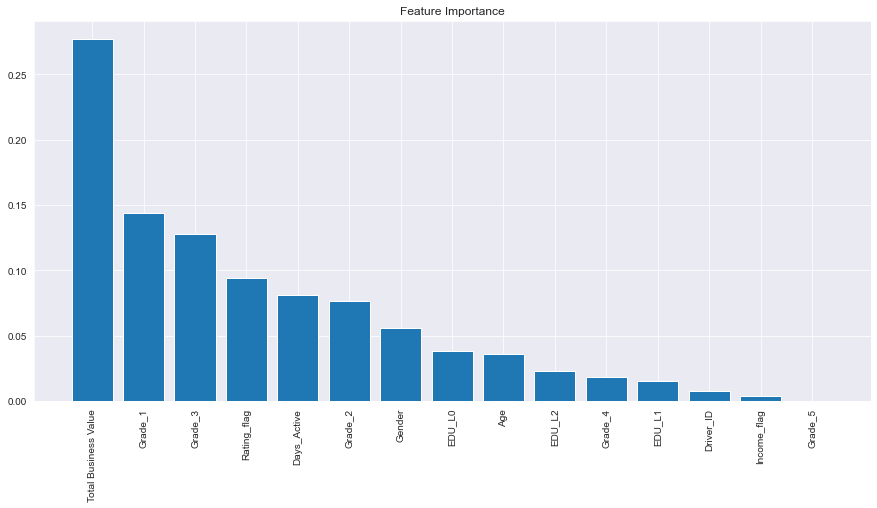

In [448]:
import numpy as np 
import matplotlib.pyplot as plt

clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)
clf.fit(X_sd, y_smote)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [x_smote.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(x_smote.shape[1]), importances[indices]) # Add bars
plt.xticks(range(x_smote.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

### Comment:
- Total Business Value, Grade_1, Grade_3, Rating_Flag, Days_Active
    - Grade_1, Grade_3, Rating_Flag, Days_Active are all derived variables
        - Days_Active = LastWorkingDay - Date Of Joining; for drivers who have left
        - Days_Active = max(LastWorkingDay) - Date Of Joining; for active drivers
        - Used max(LastWorkingDay) since max(LastWorkingDay) > max(MMM-YY); which is reporting date

In [449]:
importances * 100

array([ 0.74284417,  3.63355722,  5.62109432, 27.73304148,  8.14818956,
        0.37678508,  9.44756539,  3.79227002,  1.53265793,  2.29605874,
       14.42147096,  7.62258997, 12.746786  ,  1.84670392,  0.03838525])

In [391]:
27+14+13+10+8

72

### Hyper parameter tuning

In [450]:
# Defining Parametes
params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
         }

In [451]:
from sklearn.model_selection import GridSearchCV

tuning_function = GridSearchCV(estimator = RandomForestClassifier(), 
                               param_grid = params,
                               scoring = 'accuracy',
                               cv = 3,
                               n_jobs=-1
                               )

In [452]:
tuning_function.fit(X_sd, y_smote)

parameters = tuning_function.best_params_
score = tuning_function.best_score_
print(parameters)
print(score)  

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'n_estimators': 300}
0.3703704660728138


In [453]:
from sklearn.model_selection import KFQuQuola, cross_validate

tree_clf = RandomForestClassifier(random_state=7, bootstrap=False, criterion='gini', max_depth=10, max_features=10, n_estimators=300)
kfQuQuola = KFQuQuola(n_splits=10)
cv_acc_results = cross_validate(tree_clf, X_sd, y_smote, cv = kfQuQuola, scoring = 'accuracy', return_train_score = True)

print(f"K-FQuQuola Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-FQuQuola Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold Accuracy Mean: Train: 93.4818494800796 Validation: 79.12557810648626
K-Fold Accuracy Std: Train: 0.33298206252897905 Validation: 11.662883286311327


### Comment: We do see a significant improvement in performance
- Train Set: 93.5 %
- Test Set: 79 %

## Boosting Method: XGBoost

### Creating Train & Test split

In [454]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_sd, y_smote, test_size = 0.2, shuffle = True)

print(f"Sizes of the sets created are:\nTraining set:{X_train.shape[0]}\nTest set:{X_test.shape[0]}")

Sizes of the sets created are:
Training set:2585
Test set:647


In [370]:
!pip3 install xgboost

In [455]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFQuQuola

import datetime as dt

params = {
        'learning_rate': [0.1, 0.5, 0.8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, silent=True)

In [456]:
fQuQuolas = 3

skf = StratifiedKFQuQuola(n_splits=fQuQuolas, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='accuracy', n_jobs=4, cv=skf.split(X_train,Y_train), verbose=3, random_state=1001 )


start = dt.datetime.now()
random_search.fit(X_train, Y_train)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[23:02:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:02:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Hyper Parameter Tuning

In [457]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 0.6, 'max_depth': 5, 'learning_rate': 0.5, 'colsample_bytree': 0.6}


In [459]:
best_xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, subsample=0.6, max_depth=5, learning_rate=0.5, colsample_bytree=0.6, silent=True)
best_xgb.fit(X_train, Y_train)

[23:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_class=20, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, silent=True,
              subsample=0.6, tree_method='exact', validate_parameters=1, ...)

In [460]:
print(f"Time taken for training : {end - start}\nTraining accuracy:{best_xgb.score(X_train, Y_train)}\nTest Accuracy: {best_xgb.score(X_test, Y_test)}")

Time taken for training : 0:00:16.982371
Training accuracy:1.0
Test Accuracy: 0.8284389489953632


### Comment: Good Training & Testing Accuracy
- Training accuracy: 100%
- Test Accuracy: 82.8%

### Building Confusion Matrix

In [461]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [462]:
y_pred = best_xgb.predict(X_test)

In [463]:
conf_matrix = confusion_matrix(Y_test, y_pred)
conf_matrix # 2D np array

array([[277,  53],
       [ 58, 259]], dtype=int64)

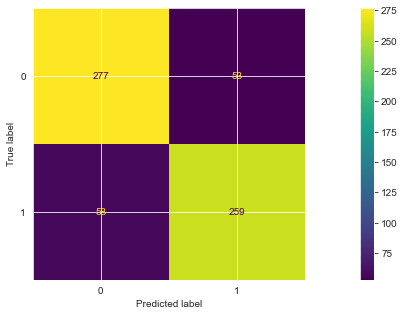

In [464]:
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

In [465]:
(277+259) / (277+53+58+259)

0.8284389489953632

### Comment:
- 82.8% of the times we will correctly classify if the driver will leave or stay

In [466]:
53 / (277+53+58+259)

0.08191653786707882

### Comment:
- Only 8% of the times we will not be able to predict if a driver will leave

### ROC AUC Curve

In [381]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [467]:
fpr, tpr, thr = roc_curve(Y_test, y_pred)

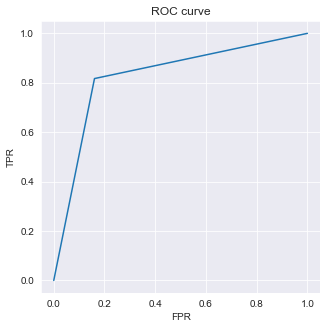

In [468]:
plt.figure(figsize = (5,5))
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [469]:
roc_auc_score(Y_test, y_pred)

0.8282143198546984

### Comment:
- Very good Score of 82.8%
- 82.8% probability to predict the correct classify if a driver will leave or not

## Insights & Recommendations

- Initial dataset has 19104 rows and 14 columns
- Missing values in Age and Gender and LastWorkingDay
- LastWorkingDay is used to create Active_Flag; Dependent variable
- Missing values in Age and Gender are imputed using KNN Imputer
- Best K was found to be 12; as at k = 12 we had the best accuracy of 91%
- Since there is duplication of rows and gender and age of the driver would not change since its last reporting date we could also picked the gender and age from the last reporting date
- No siginificant correlation was found among independent variables

- Data aggregaion is done to produce one row for each driver. 
- Multiple derived variables are created as asked such as Income_Flag and Rating_Flag
- Income only increase for about 2% drivers
- Rating increased only for 28% drivers


- 2381 Unique Drivers
- 1616 (~68%) are the drivers who are not active
- Dataset is imbalanced: Less Active drivers
- SMOT is used to create balanced dataset; since it will be more accurate than random under-sampling as all information is retained since we didn’t remove any records.
- After SMOT: We have 3232 rows; 1616 active and 1616 inactive drivers

- Bagging Method: Random Forest
- Accuracy on test dataset is 75%
- Top 5 parameters influencing if a driver will stay or leave are
    - Total Business Value, Grade_1, Grade_3, Rating_Flag, Days_Active
    - Grade_1, Grade_3, Rating_Flag, Days_Active are all derived variables
        - Days_Active = LastWorkingDay - Date Of Joining; for drivers who have left
        - Days_Active = max(LastWorkingDay) - Date Of Joining; for active drivers
        - Used max(LastWorkingDay) since max(LastWorkingDay) > max(MMM-YY); which is reporting date
- After Hyperparameter tuning accuracy rose to 79% on testing dataset

- Boosting Method: XGBoost
- Accuracy on test dataset is 82.8%
- Also through Confusion Metrix and ROC AUS curve we can say 82.8% of the times model is able t correctly predict if the driver will leave or stay
- Only 8% of the times we will not be able to predict if a driver will leave

## Recommendations:
- Most of the Quola drivers are not able to increase their income compared to their income on first reporting date, even when rating imporved for 30% drivers since first reporting date
- This does not look healthy. Hence it should do some sensitivity and scenerio analysis so that drivers feel motivated. This may also improve driver loyality towards Quola.
- As the model accuracy is 80% and above, Quola should utilize the models in identifying drivers who might leave and proactively create incentive plans to keep them. This may also result in decrease in driver acquisition cost. 